
# Logistic Regression, Trees, Random Forest, KNN
For this lab we will build a model on customer churn binary classification problem. You will be using `Data/DATA_Customer-Churn.csv` file.

### Scenario

You are working as an analyst with this internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.


### Loading libraries

In [1]:
#Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from scipy.stats import boxcox
pd.options.display.max_rows = 50
pd.options.display.max_columns = 999
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree


from sklearn.datasets import load_boston
from sklearn.datasets import load_iris

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc, confusion_matrix
from regression_module import *

In [2]:
!pip install graphviz

- Read that data into Python and call the dataframe `df`.

In [3]:
df = pd.read_csv('DATA_Customer-Churn.csv')

In [4]:
df.shape
# For this data set, (7043, 16) this represents 16 columns and 7043 rows.

(7043, 16)

- Check the datatypes of all the columns in the data. You would see that the column `TotalCharges` is object type. Convert this column into numeric type using `pd.to_numeric` function.

In [5]:
#Check Data Types
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"], errors="coerce")

In [7]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

- Check for null values in the dataframe. Replace the null values.

In [8]:
## Replacing / imputing null values
## hk_df.isna().sum()
## hk_df.isna().sum()/len(hk_df)
## Dropping columns with more null values
## Removing outliers
## It is shown as nan, technically a string should ‘null’ or ‘none’ and number as nan’ 
nulls_df = pd.DataFrame(round(df.isna().sum()/len(df),4)*100) # shows the percentage of null values in a column
# Reset Index as a column 
nulls_df = nulls_df.reset_index()
# Name the columns 
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

### Imputing the missing values, replacing them
### Decide case by case and come up with the best strategy to fill them 
### Numerical columns: Some ways to approach the problem
### Ignore these observations
### Replace with general average (Mean or Median)
### Replace with similar type of averages
### Build model to predict missing values (ML)

,header_name,percent_nulls
0,gender,0.00
1,SeniorCitizen,0.00
2,Partner,0.00
3,Dependents,0.00
4,tenure,0.00
5,PhoneService,0.00
6,OnlineSecurity,0.00
7,OnlineBackup,0.00
8,DeviceProtection,0.00
9,TechSupport,0.00


In [9]:
columns_drop = nulls_df[nulls_df['percent_nulls']>3]['header_name']  # dummy case with 3 
print(columns_drop.values)

[]


In [10]:
def remove_null_values(x):
    avg = np.mean(x)
    x = x.fillna(avg)
    return x

In [11]:
mean = (df['TotalCharges'].mean())

In [12]:
df['TotalCharges'] = df['TotalCharges'].fillna(mean)
df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [13]:
remove_null_values(df['TotalCharges'])
#the function is working
#there are no null values 

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

<ipython-input-14-f6a11fb7c37c>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

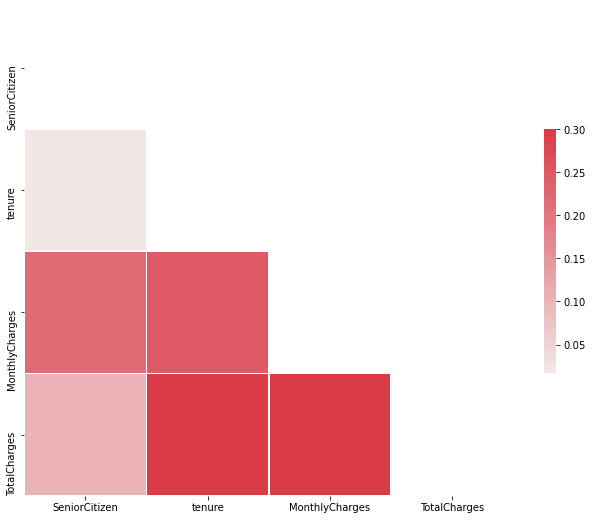

In [14]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [15]:
# Replace churn string values with numeric binary values
df.Churn.replace({"Yes":1, "No":0}, inplace = True)
# Plot correlations between our features and our target feature, churn, as a bar plot, sort by descending order
dummy_df = pd.get_dummies(df)
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 34 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeniorCitizen                         7043 non-null   int64  
 1   tenure                                7043 non-null   int64  
 2   MonthlyCharges                        7043 non-null   float64
 3   TotalCharges                          7043 non-null   float64
 4   Churn                                 7043 non-null   int64  
 5   gender_Female                         7043 non-null   uint8  
 6   gender_Male                           7043 non-null   uint8  
 7   Partner_No                            7043 non-null   uint8  
 8   Partner_Yes                           7043 non-null   uint8  
 9   Dependents_No                         7043 non-null   uint8  
 10  Dependents_Yes                        7043 non-null   uint8  
 11  PhoneService_No  

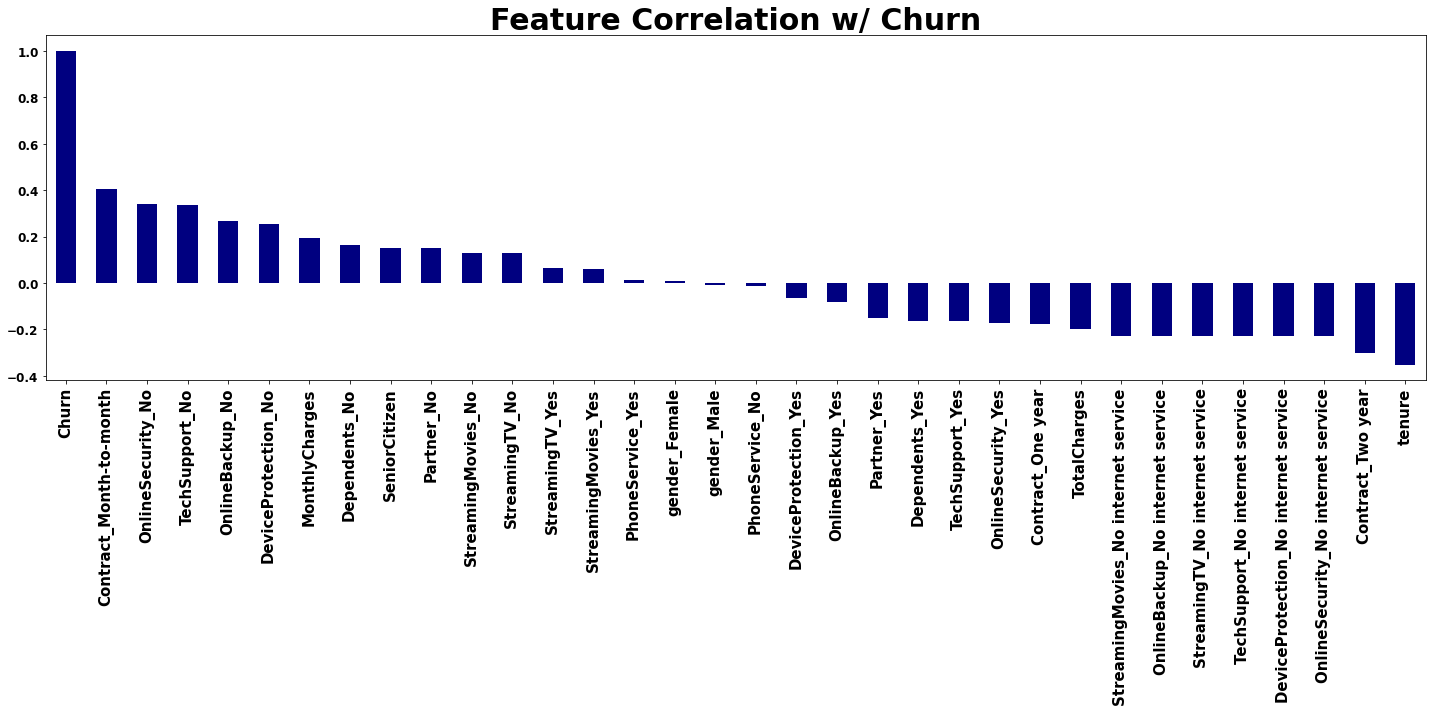

In [16]:
# Plot correlations between our features and our target feature, churn, as a
dummy_df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar', figsize = (20, 10), color = 'Navy')
plt.title('Feature Correlation w/ Churn', fontsize = 30, fontweight = 'bold')
plt.xticks(fontsize = 15, fontweight = 'bold')
plt.yticks(fontweight = 'bold', fontsize = 12)
plt.savefig('Regression_pics_corr.png')
plt.tight_layout()

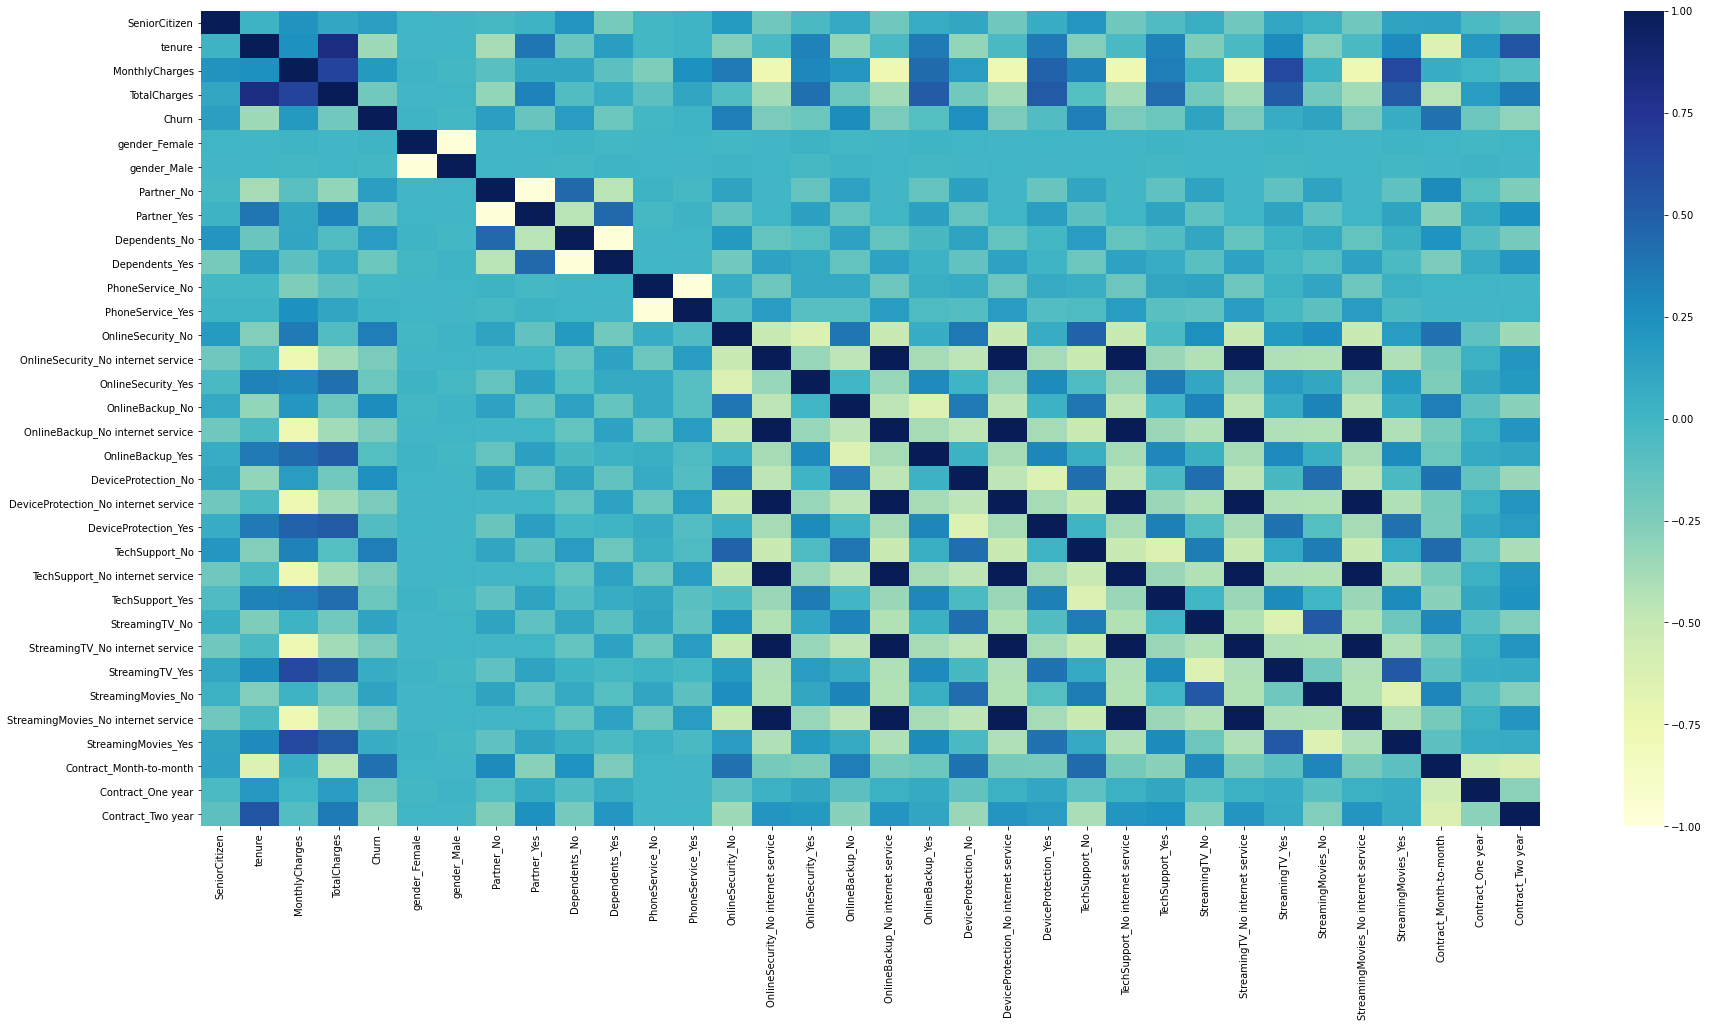

In [17]:
# Visualize a heatmap for our features correlation values
plt.figure(figsize = (30, 15))
x = sns.heatmap(dummy_df.corr(), cmap = 'YlGnBu')

From our heatmap and correlation barplot, we see that monthly contract, and a lack of online security or techsupport have the strongest positive correlation with churn. 2-Year Contracts and not having internet service are the most negatively correlated with churn.

# Pre-Processing Data for Logistic Regression

In [18]:
# Establish our target feature, churn, as our y feature
y = dummy_df.Churn.values
# Drop our target feature from our features dataframe
X = dummy_df.drop('Churn', axis = 1)
# Save dataframe column titles to list for reassigning after min max scale 
cols = X.columns

# Scaling our Data

Our data is full of numeric data now, but they are all in different units. Comparing a binary value of 1 for ‘streamingtv_Yes’ with a continuous price value of ‘monthlycharges’ will not give any relevant information because they have different units. The variables simply will not give an equal contribution to the model. 

To fix this problem, we will standardize our data values via rescaling an original variable to have equal range & variance as the remaining variables. For our purposes, we will use Min-Max Scaling [0,1] because the standardize value will lie within the binary range.

In [19]:
# Instantiate min-max scaling object
mm = MinMaxScaler()
# Fit and transform our feature dataframe
X = pd.DataFrame(mm.fit_transform(X))
# Reassign column names so new dataframe has corresponding names
X.columns = cols

# Train Test Split

We now conduct our standard train test split to separate our data into a training set and testing set.

In [20]:
# Perform train test split from our target feature series and the predicting feature dataframe (set test size to 25% of data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 33)


# Building the Model

Building the model can be done relatively quickly now, one we choose some parameters:

In [21]:
# Instantiate a Logistic Regression model without an intercept. C is set to an arbitrarily large number. Use 'liblinear' solver method.
logreg = LogisticRegression(fit_intercept = False, C = 1e12, solver = 'liblinear')
# Fit the model to our X and y training sets
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

Now that our model is built, we must predict our future values.

In [22]:
# Generate model prediction data for train and test sets
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

# Evaluating Model Performance
### How many times was the classifier correct on the training set?

Because we’re trying to predict whether a customer will leave or not, what better way to check our model performance than to see how often it was correct! 

To do so, we will take the residual distance between actual training data and predicted training data, as well as actual test data and predicted test data.

In [23]:
# Find residual differences between train data and predicted train data
residuals = np.abs(y_train - y_hat_train)
# Print value counts of our predicted values 
print(pd.Series(residuals).value_counts())
print('----------------------------------')
# Print normalized value counts of our predicted values
print(pd.Series(residuals).value_counts(normalize = True))

0    4231
1    1051
dtype: int64
----------------------------------
0    0.801022
1    0.198978
dtype: float64


# Train Set Results:
- 4231 Correct (1051 Incorrect)
- 80.1 % Accuracy

This is pretty good! On our first pass, an 80% correct rate is a strong number. 

100% accuracy would actually be a problem, as our model would be completely overfit to our data. 

Let’s check our test data (perform the same code block as above, using y_test and y_hat_test as the residual arguments.

### How many times was the classifier correct on the test set?

In [24]:
# Repeat previous step with test data
residuals = np.abs(y_test - y_hat_test)
print(pd.Series(residuals).value_counts())
print('---------------------------------')
print(pd.Series(residuals).value_counts(normalize = True))

0    1398
1     363
dtype: int64
---------------------------------
0    0.793867
1    0.206133
dtype: float64


# Test Set Results:
- 1398 Correct (363 Incorrect)
- 79.4% Accuracy

Again, positive results! Our test and train set sizes are different, so the normalized results are more meaningful here. 

The fact that our model performs about the same on our train and test sets is a positive sign that our model is performing well.


# Confusion Matrix

A confusion matrix is an extremely strong method of evaluating the performance of our classifier. A confusion matrix is a visual representation which tells us the degree of four important classification metrics:

True Positives (TP): The number of observations where the model predicted the customer would churn (1), and they actually do churn (1)

True Negatives (TN): The number of observations where the model predicted the customer would not churn (0), and they actually do not churn (0).

False Positives (FP): The number of observations where the model predicted the customer will churn (1), but in real life they do not churn (0).

False Negatives (FN): The number of observations where the model predicted the customer will not churn (0), but in real life they do churn (1).

One axis of a confusion matrix will represent the ground-truth value, while the other will represent the predicted values. At this step, it is very important to have business domain knowledge. Certain metrics are more prevalent to our model than not. 

For example, if we were modeling whether a patient has a disease, it would be much worse for a high number of false negatives than a high number of false positives. If there are many false positives, then that just means some patients would need to undergo some unnecessary testing and maybe an annoying doctor visit or two. But, a high false negative means that many patients would actually be sick and diagnosed as healthy, potentially having dire consequences. For our purposes of churn, it is worse for us to predict a customer not churning when that customer actually churns in reality, meaning that our False Negatives are more important to pay attention to.


In [25]:
# Call confusion_matrix function from sklearn.metrics using actual y_test and predicted y_test data sets 
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[1150  131]
 [ 232  248]]


We have 232 out of 1150 observations as False Negatives. This is slightly larger than we’d like but it is still a promising number. In order to derive real meaning from the confusion matrix, we must use these four metrics to produce more descriptive metrics:

1. Precision: How precise the predictions are
Precision = TP/PP
“Out of all the times the model said the customer would churn, how many times did the customer actually churn”

2. Recall: Indicates what percentage of the classes we’re interested in were actually captured by the model
Recall = TP/(TP + FN)
“Out of all customers we saw that actually churn, what percentage of them did our model correctly identify as ‘going to churn’

3. Accuracy: Measures the total number of predictions a model gets right, including both true positives and true negatives
Accuracy = (TP + TN)/(TP + FP + TN + FN)
“Out of all predictions made, what percentage were correct?”

4. F1 Score: Harmonic Mean of Precision and Recall — a strong indicator of precision and recall (cannot have a high F1 score without strong model underneath)
- F1 = 2(Precision * Recall)/(Precision + Recall)
- Penalizes models heavily if they are skewed towards precision or recall
- Generally the most used metric for model performance

These metrics can be calculated by hand in a lengthier route, but fortunately for us, Sklearn has modules which will calculate these for us. All we have to do is pass our target data set and our predicted target data set.

In [26]:
# Print 4 main logistic model metrics for training and test sets (Precision, Recall, Accuracy, F1)
print_metrics(y_train, y_hat_train, y_test, y_hat_test)

Training Metrics:
Training Precision:  0.64
Training Recall:  0.54
Training Accuracy:  0.8
Training F1-Score:  0.59


Testing Metrics:
Testing Precision:  0.65
Testing Recall:  0.52
Testing Accuracy:  0.79
Testing F1-Score:  0.58


Our results are encouraging, yet not completely satisfying. Our recall and precision scores are a little bit lower than we would expect, but our accuracy score is the strongest metric and a very good sign, especially on the first try. 

FYI: Building models is an iterative process so strong scores on the first go-around is encouraging!

# Conclusion
We built a pretty strong model for our first go around. Building any machine learning model is an iterative process, and classification modeling itself has several types of models. In some following noteebooks, I will explore these other methods, such as Decision Tree Random Forest, to see if we can improve on this customer churn model!

# Round 2 - Trees

Basics: 
- Decision trees are another type of machine learning models which can be used for regression and classification problems.
- They work with splitting or segmenting the predictor space into a number of binary decisions to make the prediction. 
- The decisions are selected in order to minimize the variance of the observations in each leaf.


Decision Trees Parameters:
- Depth: number of nodes to reach the bottom leafs
- Minimum samples leaf: minimum number of samples in a leaf.
- Minimum samples split: minimum number of samples  in decision node in order to try splitting further
- Max_features: maximum number of features to consider for split.


# A) Vanilla Decision Tree Classifier

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.tree import export_graphviz
from IPython.display import Image

import time
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

In [28]:
!pip install graphviz

In [29]:
df = df.iloc[:,1:]

In [30]:
y = df.Churn
X = df.drop('Churn', axis = 1)

In [31]:
clf1 = DecisionTreeClassifier(random_state = 33)
clf1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=33)

In [32]:
test_preds1 = clf1.predict(X_test)

In [33]:
# Calculate and print all four major metrics
print(f"Precision Score: {precision_score(y_test, test_preds1)}")
print(f"Recall Score: {recall_score(y_test, test_preds1)}")
print(f"Accuracy Score: {accuracy_score(y_test, test_preds1)}")
print(f"F1 Score: {f1_score(y_test, test_preds1)}")

Precision Score: 0.5125
Recall Score: 0.5125
Accuracy Score: 0.7342419080068143
F1 Score: 0.5125


AUC Score: 0.6649151053864168


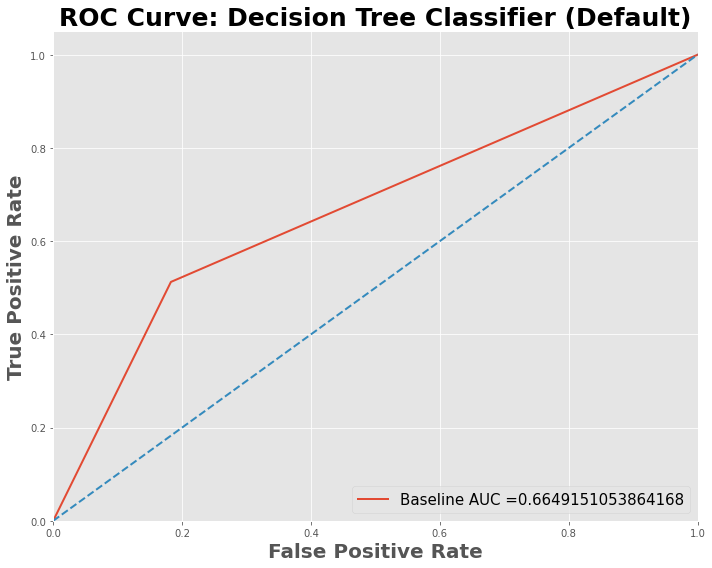

In [34]:
fpr, tpr, threshold = roc_curve(y_test, test_preds1)
# Calculate AUC score from sklearn.metrics library
roc_auc = auc(fpr, tpr)
# Print auc score
print(f'AUC Score: {roc_auc}')

# Plot AUC curve
plt.style.use('ggplot')
plt.figure(figsize = (10,8))
plt.plot(fpr, tpr, lw = 2, label = 'Baseline AUC ='+str(roc_auc))
plt.plot([0,1],[0,1], linestyle = '--', lw = 2)
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate', fontsize = 20, fontweight = 'bold')
plt.ylabel('True Positive Rate', fontsize = 20, fontweight = 'bold')
plt.title('ROC Curve: Decision Tree Classifier (Default)', fontsize = 25, fontweight = 'bold')
plt.legend(loc = 4, fontsize = 15)
plt.tight_layout()

In [35]:
pd.crosstab(y_test, test_preds1, rownames = ['True'], colnames = ['Predicted'], margins = True)

Predicted,0,1,All
True,,,
0,1047,234,1281
1,234,246,480
All,1281,480,1761


# GridSearchCV Classifier

In [52]:
clf3 = DecisionTreeClassifier(random_state = 33)
param_grid = {
    'criterion':['gini','entropy'],
    'max_depth':[None, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
    'min_samples_split':[20, 25, 30, 35, 40],
    'min_samples_leaf':[1,2,3,4,5,6]
}
gs_tree = GridSearchCV(clf3, param_grid, cv = 4, verbose = True)
gs_tree.fit(X_train, y_train)

Fitting 4 folds for each of 720 candidates, totalling 2880 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=33),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                                       20],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [20, 25, 30, 35, 40]},
             verbose=True)

In [53]:
print(f"Best Parameters: {gs_tree.best_params_}")
print(f"Best Score: {gs_tree.best_score_}")

Best Parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 30}
Best Score: 0.7932621063014704


# GridSearchCV Decision Tree Model

In [54]:
final_clf = DecisionTreeClassifier(
    criterion = 'entropy',
    max_depth = 6,
    min_samples_leaf = 1,
    min_samples_split = 30,
    random_state = 33)
final_clf.fit(X_train, y_train)
test_preds2 = final_clf.predict(X_test)

In [55]:
# Print 4 major metrics
print(f"Precision Score: {precision_score(y_test, test_preds2)}")
print(f"Recall Score: {recall_score(y_test, test_preds2)}")
print(f"Accuracy Score: {accuracy_score(y_test, test_preds2)}")
print(f"F1 Score: {f1_score(y_test, test_preds2)}")

Precision Score: 0.656891495601173
Recall Score: 0.4666666666666667
Accuracy Score: 0.7881885292447472
F1 Score: 0.5456760048721071


AUC Score: 0.6876658860265418


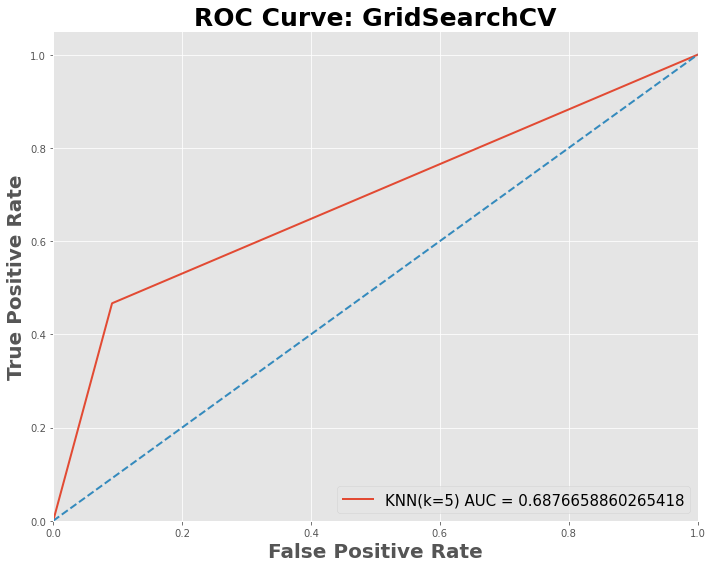

In [56]:
fpr, tpr, threshold = roc_curve(y_test, test_preds2)
roc_auc = auc(fpr, tpr)
print(f'AUC Score: {roc_auc}')

plt.style.use('ggplot')
plt.figure(figsize = (10,8))
plt.plot(fpr, tpr,lw = 2, label = 'KNN(k=5) AUC = '+str(roc_auc))
plt.plot([0,1],[0,1], linestyle = '--', lw = 2)
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate', fontsize = 20, fontweight = 'bold')
plt.ylabel('True Positive Rate', fontsize = 20, fontweight = 'bold')
plt.title('ROC Curve: GridSearchCV', fontsize = 25, fontweight = 'bold')
plt.legend(loc = 4, fontsize = 15)
plt.tight_layout()

In [57]:
pd.crosstab(y_test, test_preds2, rownames = ['True'], colnames = ['Predicted'], margins = True)


Predicted,0,1,All
True,,,
0,1164,117,1281
1,256,224,480
All,1420,341,1761


# B) Vanilla Classifier: Manual Pruning

## Max Depth

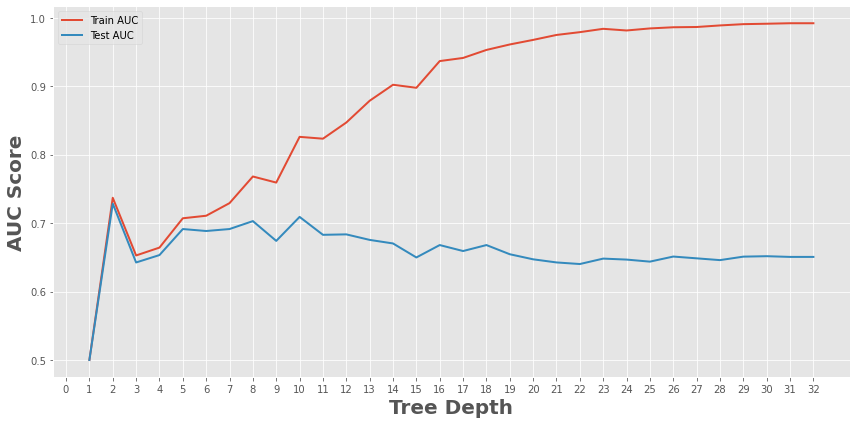

In [103]:
max_depths = np.linspace(1,32,32,endpoint = True)
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth, random_state = 33)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    fpr, tpr, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(fpr, tpr)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    test_results.append(roc_auc)
    
plt.figure(figsize = (12, 6))
plt.plot(max_depths, train_results, label = 'Train AUC', lw = 2)
plt.plot(max_depths, test_results, label = 'Test AUC', lw = 2)
plt.ylabel('AUC Score', fontsize = 20, fontweight = 'bold')
plt.xticks(np.arange(0,33))
plt.xlabel('Tree Depth', fontsize = 20, fontweight = 'bold')
plt.legend()
plt.tight_layout()

- Training error decreases with tree depth (a sign of overfitting as tree depth increases)
- Test error increases after depth = 3 (some fluctuations, not stable)
- Training and Test errors rise rapidly between depths of 3 & 4
- Optimal value roughly 2/3

# Minimum Sample Split

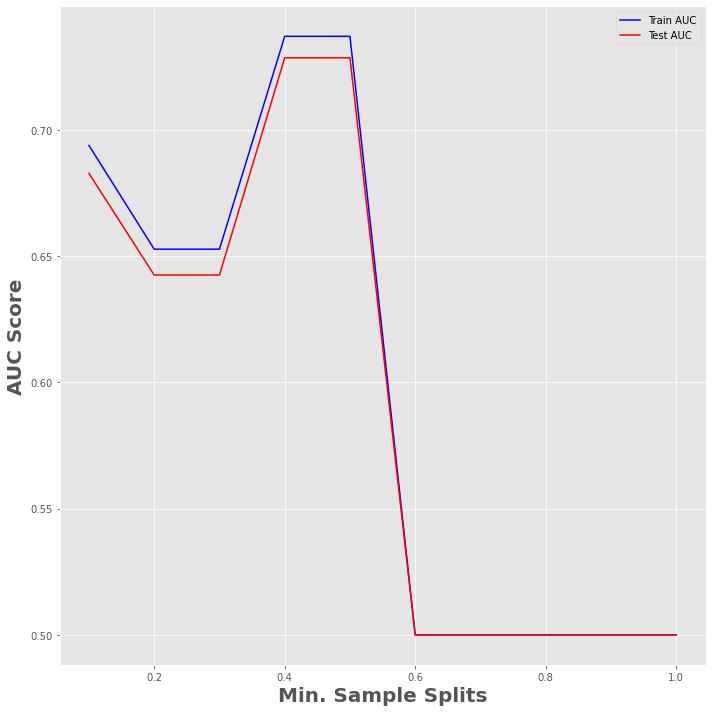

In [44]:
min_samples_split = np.linspace(0.1, 1.0, 10, endpoint = True)
train_results = []
test_results = []
for min_split in min_samples_split:
    dt = DecisionTreeClassifier('entropy', min_samples_split = min_split, random_state = 33)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    fpr, tpr, threshold = roc_curve(y_train, train_pred)
    roc_auc = auc(fpr, tpr)
    train_results.append(roc_auc)
    test_pred = dt.predict(X_test)
    fpr, tpr, threshold = roc_curve(y_test, test_pred)
    roc_auc = auc(fpr, tpr)
    test_results.append(roc_auc)
    
plt.figure(figsize = (10, 10))
plt.plot(min_samples_split, train_results, 'b', label = 'Train AUC')
plt.plot(min_samples_split, test_results, 'r', label = 'Test AUC')
plt.xlabel('Min. Sample Splits', fontweight = 'bold', fontsize = 20)
plt.ylabel('AUC Score', fontweight = 'bold', fontsize = 20)
plt.title('')
plt.legend()
plt.tight_layout()

In [45]:
# Min Samples Split both train and test both begin to stabilize at min_samples_split = 33
# Further increase in min_sample_split will not increase learning ability

# Min Samples Leaf

- Identify min. number of samples that we want a leaf node to contain
- When min. size is achieved at a node, it does not get split any further
- Too many samples in leaf node indicate high level of uncertainty in data


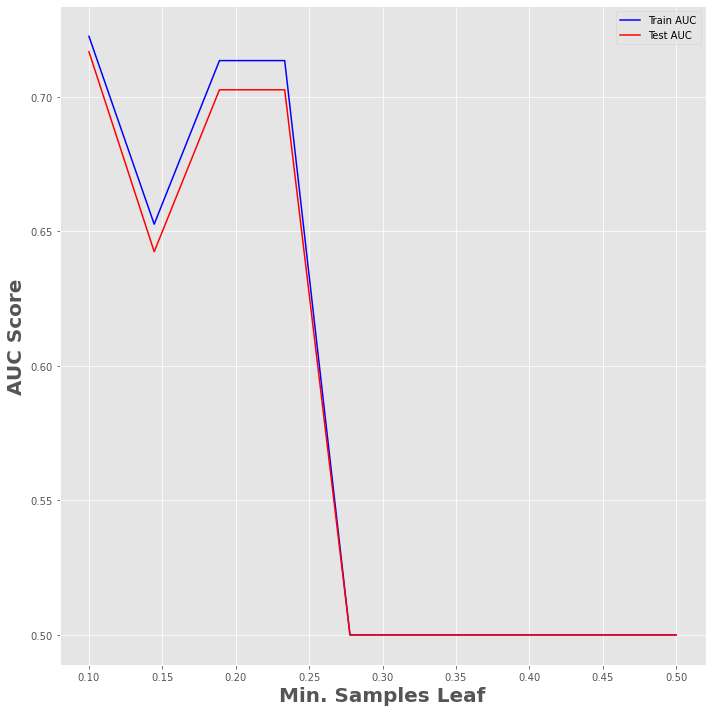

In [46]:
min_samples_leaf = np.linspace(0.1, 0.5, 10, endpoint = True)
train_results = []
test_results = []
for min_leaf in min_samples_leaf:
    dt = DecisionTreeClassifier('entropy', min_samples_leaf = min_leaf, random_state = 33)
    dt.fit(X_train, y_train)
    train_preds = dt.predict(X_train)
    fpr, tpr, threshold = roc_curve(y_train, train_preds)
    roc_auc = auc(fpr, tpr)
    train_results.append(roc_auc)
    test_preds = dt.predict(X_test)
    fpr, tpr, threshold = roc_curve(y_test, test_preds)
    roc_auc = auc(fpr, tpr)
    test_results.append(roc_auc)
    
plt.figure(figsize = (10,10))
plt.plot(min_samples_leaf, train_results, 'b', label = 'Train AUC')
plt.plot(min_samples_leaf, test_results, 'r', label = 'Test AUC')
plt.xlabel('Min. Samples Leaf', fontweight = 'bold', fontsize = 20)
plt.ylabel('AUC Score', fontweight = 'bold', fontsize = 20)
plt.legend()
plt.tight_layout()


- Accuracy decreases significantly after 0.23 for both test and train

# Maximum Features

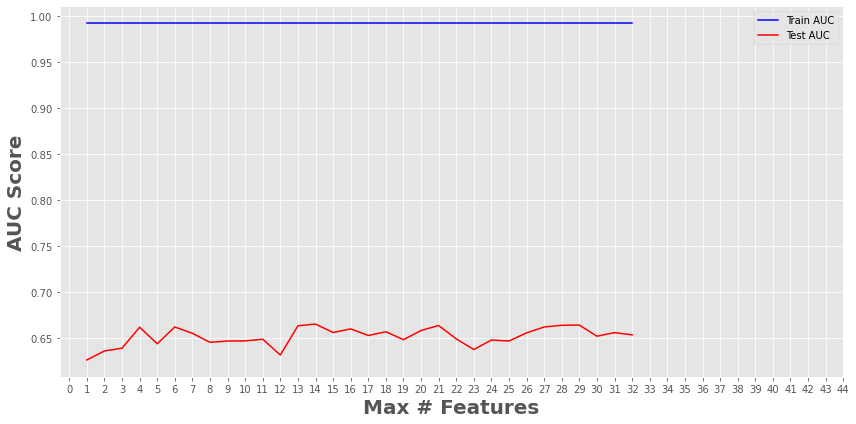

In [47]:
max_features = list(range(1, X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    dt = DecisionTreeClassifier('entropy', max_features = max_feature, random_state = 33)
    dt.fit(X_train, y_train)
    train_preds = dt.predict(X_train)
    fpr, tpr, thresholds = roc_curve(y_train, train_preds)
    roc_auc = auc(fpr, tpr)
    train_results.append(roc_auc)
    test_preds = dt.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, test_preds)
    roc_auc = auc(fpr, tpr)
    test_results.append(roc_auc)
    
plt.figure(figsize = (12,6))
plt.plot(max_features, train_results, 'b', label = 'Train AUC')
plt.plot(max_features, test_results, 'r', label = 'Test AUC')
plt.xlabel('Max # Features', fontweight = 'bold', fontsize = 20)
plt.xticks(np.arange(0, 45))
plt.ylabel('AUC Score', fontweight = 'bold', fontsize = 20)
plt.legend()
plt.tight_layout()

- No clear effect on training (flat AUC)
- Multiple fluctuations in test AUC but not definitive
- Highest AUC value is 21

# C) Manual Pruning Classifier Model

In [48]:
dt2 = DecisionTreeClassifier(
                            criterion = 'entropy',
                            max_depth = 3,
                            min_samples_split = 0.4,
                            min_samples_leaf = 0.23,
                            random_state = 33)
dt2.fit(X_train, y_train)
y_preds = dt2.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_preds)
roc_auc = auc(fpr, tpr)
roc_auc

0.702683450429352

In [49]:
print(f"Precision Score: {precision_score(y_test, y_preds)}")
print(f"Recall Score: {recall_score(y_test, y_preds)}")
print(f"Accuracy Score: {accuracy_score(y_test, y_preds)}")
print(f"F1 Score: {f1_score(y_test, y_preds)}")

Precision Score: 0.5289855072463768
Recall Score: 0.6083333333333333
Accuracy Score: 0.7455990914253265
F1 Score: 0.5658914728682171


AUC Score: 0.702683450429352


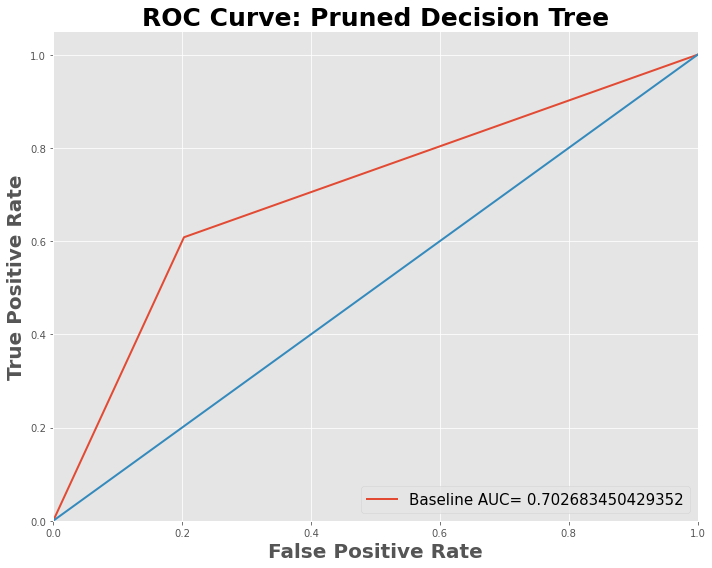

In [50]:
print(f'AUC Score: {roc_auc}')
plt.figure(figsize = (10, 8))
plt.plot(fpr, tpr, lw = 2, label = 'Baseline AUC= ' + str(roc_auc))
plt.plot([0,1], [0,1], lw = 2)
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate', fontweight = 'bold', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20, fontweight = 'bold')
plt.title('ROC Curve: Pruned Decision Tree', fontweight = 'bold', fontsize = 25)
plt.legend(loc = 4, fontsize = 15)
plt.tight_layout()

In [51]:
pd.crosstab(y_test, y_preds, rownames = ['True'], colnames = ['Predicted'], margins = True)

Predicted,0,1,All
True,,,
0,1021,260,1281
1,188,292,480
All,1209,552,1761


# Round 3 - Random Forest  

# RF Bagging 

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from regression_module import viz_roc

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# A) Bagged Trees

In [60]:
bagged_tree = BaggingClassifier(DecisionTreeClassifier('gini', max_depth = 5), n_estimators = 20)
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=20)

In [63]:
bagged_tree.score(X_train, y_train)

0.810109806891329

In [64]:
bagged_tree.score(X_test, y_test)

0.8012492901760363

# B) Bagged Trees 2 - W/ GridSearchCV

In [65]:
dt = DecisionTreeClassifier(
                            criterion = 'entropy',
                            max_depth = 6,
                            min_samples_leaf = 1,
                            min_samples_split = 30,
                            random_state = 33)

bc_param_grid = {
    'bootstrap':[True, False],
    'bootstrap_features':[True, False],
    'n_estimators':[1,5,10,15,20,25],
    'max_samples':[0.2,0.4,0.6,0.8,1.0]
}

grid_search = GridSearchCV(BaggingClassifier(dt), param_grid = bc_param_grid, cv = 4, verbose = True)
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                               max_depth=6,
                                                                               min_samples_split=30,
                                                                               random_state=33)),
             param_grid={'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_samples': [0.2, 0.4, 0.6, 0.8, 1.0],
                         'n_estimators': [1, 5, 10, 15, 20, 25]},
             verbose=True)

In [66]:
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

Best Parameters: {'bootstrap': True, 'bootstrap_features': False, 'max_samples': 0.4, 'n_estimators': 25}
Best Score: 0.8012126373500332


In [67]:
test_preds = grid_search.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, test_preds)
roc_auc = auc(fpr, tpr)

In [68]:
print(f"Precision Score: {precision_score(y_test, test_preds)}")
print(f"Recall Score: {recall_score(y_test, test_preds)}")
print(f"Accuracy Score: {accuracy_score(y_test, test_preds)}")
print(f"F1 Score: {f1_score(y_test, test_preds)}")

Precision Score: 0.6771428571428572
Recall Score: 0.49375
Accuracy Score: 0.7978421351504826
F1 Score: 0.5710843373493976


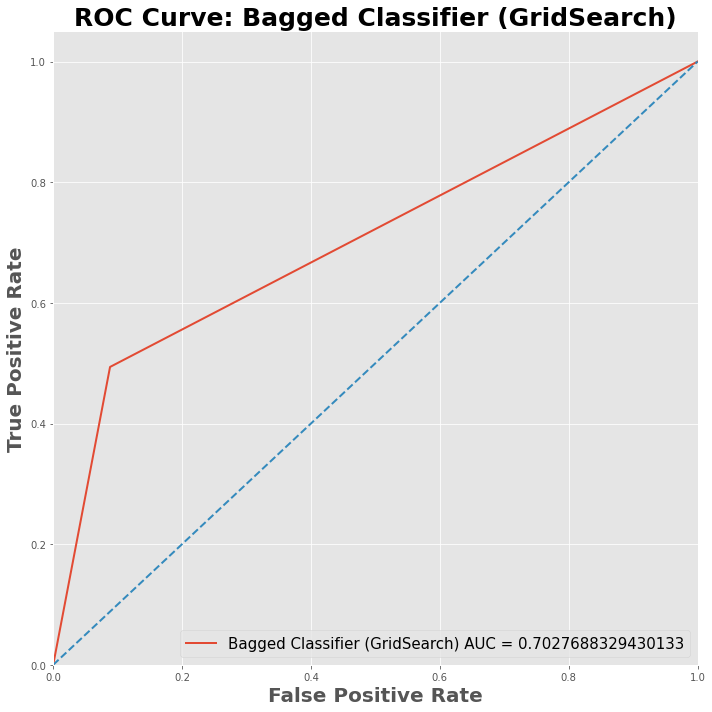

In [69]:
viz_roc(fpr, tpr, roc_auc, 'Bagged Classifier (GridSearch)')


In [70]:
pd.crosstab(y_test, test_preds, rownames = ['True'], colnames = ['Predicted'], margins = True)


Predicted,0,1,All
True,,,
0,1168,113,1281
1,243,237,480
All,1411,350,1761


In [71]:
report1 = pd.DataFrame(classification_report(y_test, test_preds, output_dict = True)).transpose()
report1

,precision,recall,f1-score,support
0,0.827782,0.911788,0.867756,1281.000000
1,0.677143,0.493750,0.571084,480.000000
accuracy,0.797842,0.797842,0.797842,0.797842
macro avg,0.752462,0.702769,0.719420,1761.000000
weighted avg,0.786722,0.797842,0.786892,1761.000000


# C) Random Forest - Vanilla

In [72]:
rf = RandomForestClassifier(random_state = 33)
rf.fit(X_train, y_train)
test_preds = rf.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, test_preds)
roc_auc = auc(fpr, tpr)

In [73]:
print(f"Precision Score: {precision_score(y_test, test_preds)}")
print(f"Recall Score: {recall_score(y_test, test_preds)}")
print(f"Accuracy Score: {accuracy_score(y_test, test_preds)}")
print(f"F1 Score: {f1_score(y_test, test_preds)}")

Precision Score: 0.6174863387978142
Recall Score: 0.4708333333333333
Accuracy Score: 0.7762634866553095
F1 Score: 0.5342789598108748


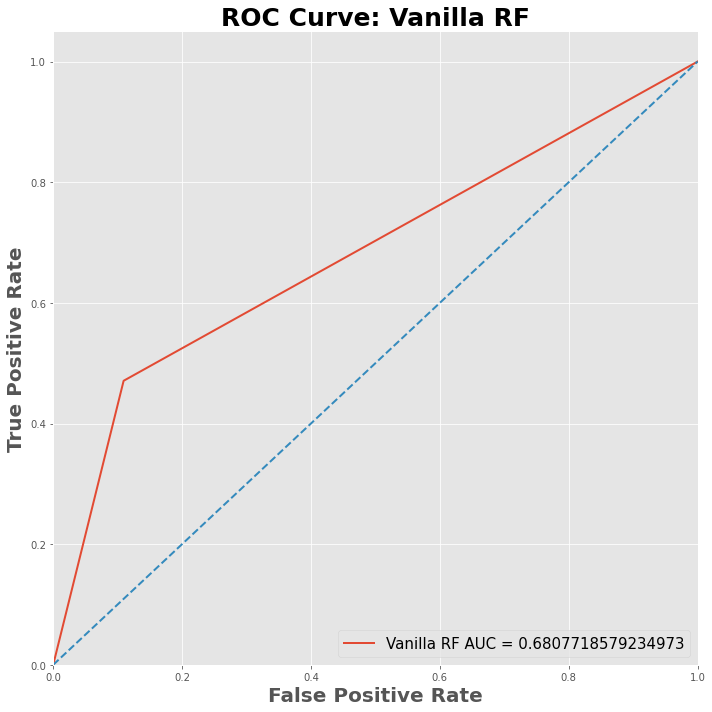

In [74]:
viz_roc(fpr, tpr, roc_auc, 'Vanilla RF')

In [75]:
pd.crosstab(y_test, test_preds, rownames = ['True'], colnames = ['Predicted'], margins = True)

Predicted,0,1,All
True,,,
0,1141,140,1281
1,254,226,480
All,1395,366,1761


In [76]:
report2 = pd.DataFrame(classification_report(y_test, test_preds, output_dict = True)).transpose()
report2

,precision,recall,f1-score,support
0,0.817921,0.890710,0.852765,1281.000000
1,0.617486,0.470833,0.534279,480.000000
accuracy,0.776263,0.776263,0.776263,0.776263
macro avg,0.717704,0.680772,0.693522,1761.000000
weighted avg,0.763288,0.776263,0.765955,1761.000000


# D) Random Forest - GridSearchCV


In [77]:
param_grid = {
            'n_estimators': [20,22,25],
            'max_features': ['auto'],
            'max_depth': [8,10,12],
            'min_samples_split' : [20,25,30],
            'min_samples_leaf' : [1, 2, 3],
            'bootstrap':[True]
}


In [78]:
gs_rf = GridSearchCV(RandomForestClassifier(), param_grid, cv = 4, verbose = True)
gs_rf.fit(X_train, y_train)

Fitting 4 folds for each of 81 candidates, totalling 324 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [8, 10, 12],
                         'max_features': ['auto'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [20, 25, 30],
                         'n_estimators': [20, 22, 25]},
             verbose=True)

In [79]:
test_preds = gs_rf.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, test_preds)
roc_auc = auc(fpr, tpr)

In [80]:
gs_rf.best_params_

{'bootstrap': True,
 'max_depth': 12,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 25,
 'n_estimators': 25}

In [81]:
gs_rf.best_score_

0.8006440254169248

In [82]:
print(f"Precision Score: {precision_score(y_test, test_preds)}")
print(f"Recall Score: {recall_score(y_test, test_preds)}")
print(f"Accuracy Score: {accuracy_score(y_test, test_preds)}")
print(f"F1 Score: {f1_score(y_test, test_preds)}")

Precision Score: 0.7011834319526628
Recall Score: 0.49375
Accuracy Score: 0.80465644520159
F1 Score: 0.5794621026894866


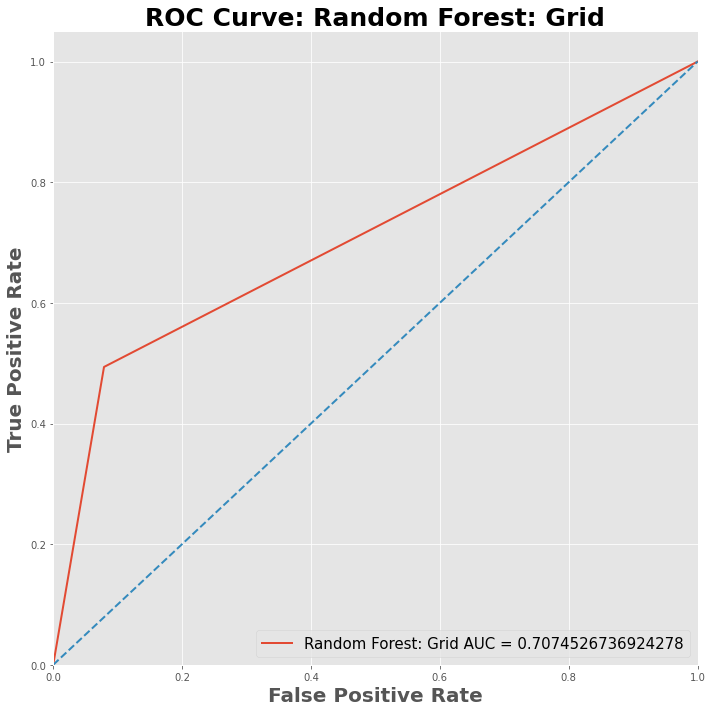

In [83]:
viz_roc(fpr, tpr, roc_auc, 'Random Forest: Grid')

In [84]:
pd.crosstab(y_test, test_preds, rownames = ['True'], colnames = ['Predicted'], margins = True)

Predicted,0,1,All
True,,,
0,1180,101,1281
1,243,237,480
All,1423,338,1761


In [85]:
report3 = pd.DataFrame(classification_report(y_test, test_preds, output_dict = True)).transpose()
report3

,precision,recall,f1-score,support
0,0.829234,0.921155,0.872781,1281.000000
1,0.701183,0.493750,0.579462,480.000000
accuracy,0.804656,0.804656,0.804656,0.804656
macro avg,0.765209,0.707453,0.726122,1761.000000
weighted avg,0.794331,0.804656,0.792830,1761.000000


In [86]:
report1, report2, report3

(              precision    recall  f1-score      support
 0              0.827782  0.911788  0.867756  1281.000000
 1              0.677143  0.493750  0.571084   480.000000
 accuracy       0.797842  0.797842  0.797842     0.797842
 macro avg      0.752462  0.702769  0.719420  1761.000000
 weighted avg   0.786722  0.797842  0.786892  1761.000000,
               precision    recall  f1-score      support
 0              0.817921  0.890710  0.852765  1281.000000
 1              0.617486  0.470833  0.534279   480.000000
 accuracy       0.776263  0.776263  0.776263     0.776263
 macro avg      0.717704  0.680772  0.693522  1761.000000
 weighted avg   0.763288  0.776263  0.765955  1761.000000,
               precision    recall  f1-score      support
 0              0.829234  0.921155  0.872781  1281.000000
 1              0.701183  0.493750  0.579462   480.000000
 accuracy       0.804656  0.804656  0.804656     0.804656
 macro avg      0.765209  0.707453  0.726122  1761.000000
 weighted av

# Round 4 - KNN

- This method makes the prediction for a new observation, based on the K-Nearest Neighbours.

- The “distance” between the neighbours can be anyone: Euclidean, Manhattan, Minkowski,..... The optimal one depends on the problem.

- The value of K has to be provided beforehand. 

- The optimal value for K can be obtained by trial and error. Extreme cases are K=1, K=N = number of observations (majority vote).

- This method can deal with:

- Regression (average value from the neighbours)
- Classification  (most frequent value from the neighbours)

- The optimal value for K can be obtained plotting the error metrics of interest as a function of K.. 


In [87]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc


from regression_module import *
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [88]:
# Remove first two unnecessary columns from DF
df = df.iloc[:,2:]

In [92]:
# Instantiate KNN object
knn1 = KNeighborsClassifier()

# Fit training set to our classifying object
knn1.fit(X_train, y_train)

KNeighborsClassifier()

In [93]:
# Assign predictions to variable
test_preds1 = knn1.predict(X_test)

# Calculate (accuracy) score metric
knn1.score(X_test, y_test)

0.7541169789892107

In [94]:
# Calculate and print all four major metrics
print(f"Precision Score: {precision_score(y_test, test_preds1)}")
print(f"Recall Score: {recall_score(y_test, test_preds1)}")
print(f"Accuracy Score: {accuracy_score(y_test, test_preds1)}")
print(f"F1 Score: {f1_score(y_test, test_preds1)}")

Precision Score: 0.5586034912718204
Recall Score: 0.4666666666666667
Accuracy Score: 0.7541169789892107
F1 Score: 0.5085130533484676


AUC Score: 0.6642466822794693


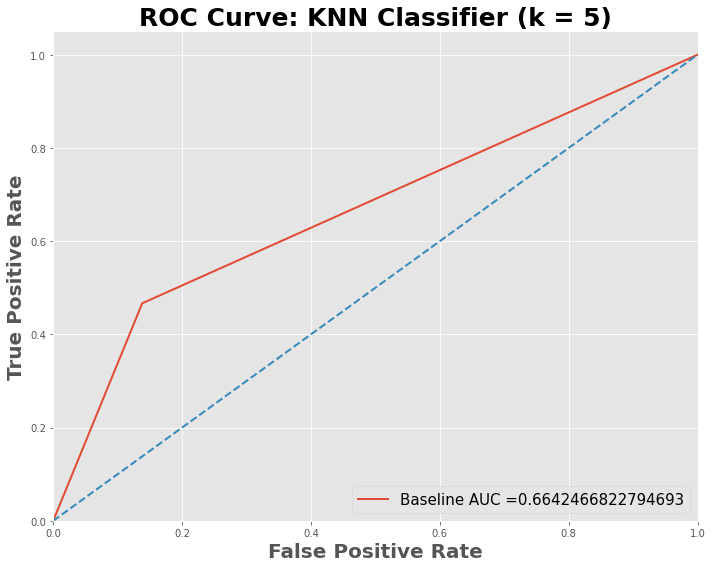

In [95]:
# Assign false positive rate, true pos rate, and thresholds to variables using sklearn.metrics library
fpr, tpr, threshold = roc_curve(y_test, test_preds1)
# Calculate AUC score from sklearn.metrics library
roc_auc = auc(fpr, tpr)
# Print auc score
print(f'AUC Score: {roc_auc}')

# Plot AUC curve
plt.style.use('ggplot')
plt.figure(figsize = (10,8))
plt.plot(fpr, tpr, lw = 2, label = 'Baseline AUC ='+str(roc_auc))
plt.plot([0,1],[0,1], linestyle = '--', lw = 2)
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate', fontsize = 20, fontweight = 'bold')
plt.ylabel('True Positive Rate', fontsize = 20, fontweight = 'bold')
plt.title('ROC Curve: KNN Classifier (k = 5)', fontsize = 25, fontweight = 'bold')
plt.legend(loc = 4, fontsize = 15)
plt.tight_layout()

# Cross Val - KNN Classifier

In [96]:
# Instantiate KNN classifier object again, assigning a different name
knn_clf = KNeighborsClassifier()

# perform a cross validation score using sklearn.model_selection (iterate until maximum output score)
knn_cv_score = cross_val_score(knn_clf, X_train, y_train, cv = 4)

# Use numpy to obtain mean accuracy score from cross-validation folds and display
mean_knn_cv_score = np.mean(knn_cv_score)
print(f"Mean Cross Validation Score: {mean_knn_cv_score :.2%}")

Mean Cross Validation Score: 76.07%


In [97]:
# Instantiate a second KNN classifier object
knn2 = KNeighborsClassifier()
# Establish parameters grid in dictionary form per KNN documentation
param_grid = {'n_neighbors':np.arange(1,20)}
# Pass instantiated KNN object, parameter grid, and optimal fold value as arguments
knn2_gscv = GridSearchCV(knn2, param_grid, cv = 4)
# Fit train data to our new object
knn2_gscv.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [98]:
# Return best parameters and score
print(f"Best Parameters: {knn2_gscv.best_params_}")
print(f"Best Score: {knn2_gscv.best_score_}")

Best Parameters: {'n_neighbors': 12}
Best Score: 0.7762199493037873


In [99]:
# Predict test values
test_preds2 = knn2_gscv.predict(X_test)

In [100]:
# Obtain second accuracy score of optimal model
knn2_gscv.score(X_test,y_test)

0.7739920499716071

In [101]:
# Print 4 major metrics
print(f"Precision Score: {precision_score(y_test, test_preds2)}")
print(f"Recall Score: {recall_score(y_test, test_preds2)}")
print(f"Accuracy Score: {accuracy_score(y_test, test_preds2)}")
print(f"F1 Score: {f1_score(y_test, test_preds2)}")

Precision Score: 0.625
Recall Score: 0.4270833333333333
Accuracy Score: 0.7739920499716071
F1 Score: 0.5074257425742574


AUC Score: 0.6655322989851677


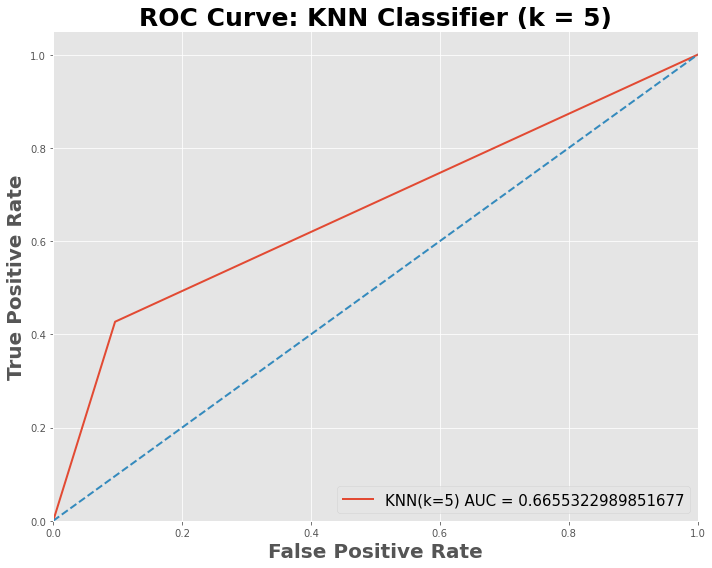

In [102]:
# Obtain major metrics and plot second ROC curve
fpr, tpr, threshold = roc_curve(y_test, test_preds2)
roc_auc = auc(fpr, tpr)
print(f'AUC Score: {roc_auc}')

plt.style.use('ggplot')
plt.figure(figsize = (10,8))
plt.plot(fpr, tpr,lw = 2, label = 'KNN(k=5) AUC = '+str(roc_auc))
plt.plot([0,1],[0,1], linestyle = '--', lw = 2)
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate', fontsize = 20, fontweight = 'bold')
plt.ylabel('True Positive Rate', fontsize = 20, fontweight = 'bold')
plt.title('ROC Curve: KNN Classifier (k = 5)', fontsize = 25, fontweight = 'bold')
plt.legend(loc = 4, fontsize = 15)
plt.tight_layout()